## Linear Regression Using Sklearn


#### Supervised ML Life Cycle (Sklearn Workflow)
=> (1) Data Acquisition -> (2) Data Preprocessing/Feature Engineering -> (3) Choose Estimator -> (4) Train-Test Split -> (5) Create Model Instance -> (6) Trainging Model -> (7) Model Evaluation -> (8) Hyper-Parameter Tuning -> (9) Model Deployment -> (10) Predicting/ Monitoring

#### Data Preprocessing and Feature Engineering 
1) Dedecting and handling outliers
2) Missing Values Imputations
3) Encoding Categorical Features
4) Feature Scaling
5) Extracting Information
6) Combining Information

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Assumptions for Linear Regression
1) Linearity
2) Independence
3) Homoscedasticity
4) Normality

- ***Linearity***
- All the independent variables (features/inputs) should be somehow correlated with the dependent variable (label/features)
- Can verify it using scatterplot and Pearson Correlation Coefficient.
- Violation of this assumption will cause overfitting

<Axes: title={'center': 'Pearson Coerraltion Coefficient:0.228'}, xlabel='newspaper', ylabel='sales'>

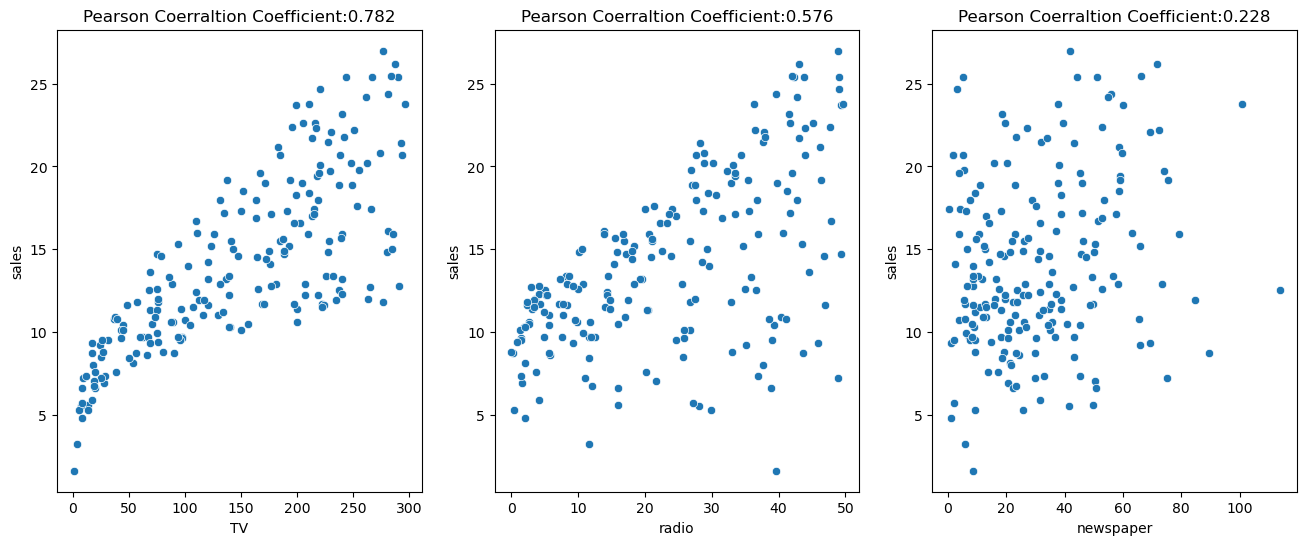

In [15]:
tv = np.array(df['TV'])
radio = np.array(df['radio'])
newspaper = np.array(df['newspaper'])
y = np.array(df['sales'])

x = tv
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_tv = nomerator/denomirator

x = radio
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_radio = nomerator/denomirator

x = newspaper
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_newspaper = nomerator/denomirator

fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (16, 6))
ax1.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_tv))
sns.scatterplot(x = df['TV'], y = df['sales'], data = df, ax = ax1)


ax2.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_radio))
sns.scatterplot(x = df['radio'], y = df['sales'], data = df, ax = ax2)


ax3.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_newspaper))
sns.scatterplot(x = df['newspaper'], y = df['sales'], data = df, ax = ax3)

#### Independence
- All the independent variables (features) should not have any correlation with eachother (should be independent)
- Verify using scatterplot and Pearson Corelation coefficient
- Violation of this assuption will cause multicolinearity (Corelation coefficient become unstable and difficult to interpret)

<Axes: title={'center': 'Pearson Coerraltion Coefficient:0.057'}, xlabel='newspaper', ylabel='TV'>

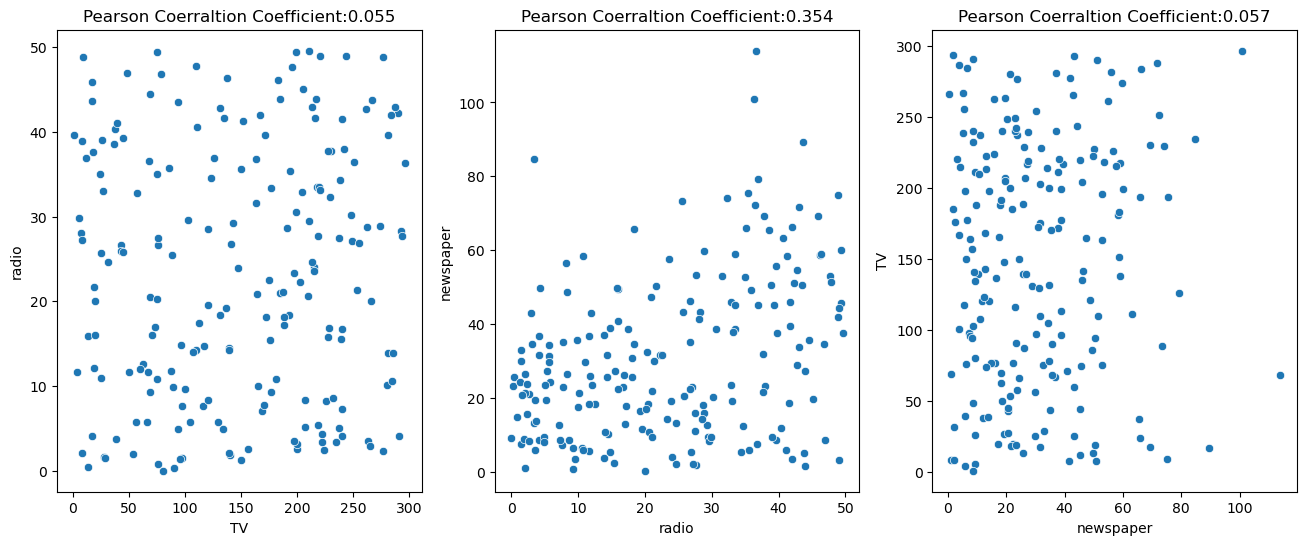

In [17]:
tv = np.array(df['TV'])
radio = np.array(df['radio'])
newspaper = np.array(df['newspaper'])


x = tv
y = radio
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_tv_radio = nomerator/denomirator

x = radio
y = newspaper
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_radio_newspaper = nomerator/denomirator

x = newspaper
y = tv
nomerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denomirator = (np.sqrt(np.sum((x-np.mean(x))**2)))*(np.sqrt(np.sum((y-np.mean(y))**2)))
r_newspaper_tv = nomerator/denomirator

fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (16, 6))
ax1.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_tv_radio))
sns.scatterplot(x = df['TV'], y = df['radio'], data = df, ax = ax1)


ax2.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_radio_newspaper))
sns.scatterplot(x = df['radio'], y = df['newspaper'], data = df, ax = ax2)


ax3.set_title("Pearson Coerraltion Coefficient:{:.3f}".format(r_newspaper_tv))
sns.scatterplot(x = df['newspaper'], y = df['TV'], data = df, ax = ax3)

#### Homoscedasticity
- Variance of the residual errors should be constant in the regression model
- Verify using residual plots (residual errors on the vertical axis and independent variable on the horizontal axis) {Can be verified after model has been trained}
- Violation of this assuption shows that coefficients are less accurate.

#### Normality (Can be verified after model has been trained)
- The residuals (errors) of the regression line should be normally distributed
- Verify using histogram of the residuals (should not be skewed)
- violations shows that the regression coefficients are incorrect
- It may be due to the outliers in the independent variables

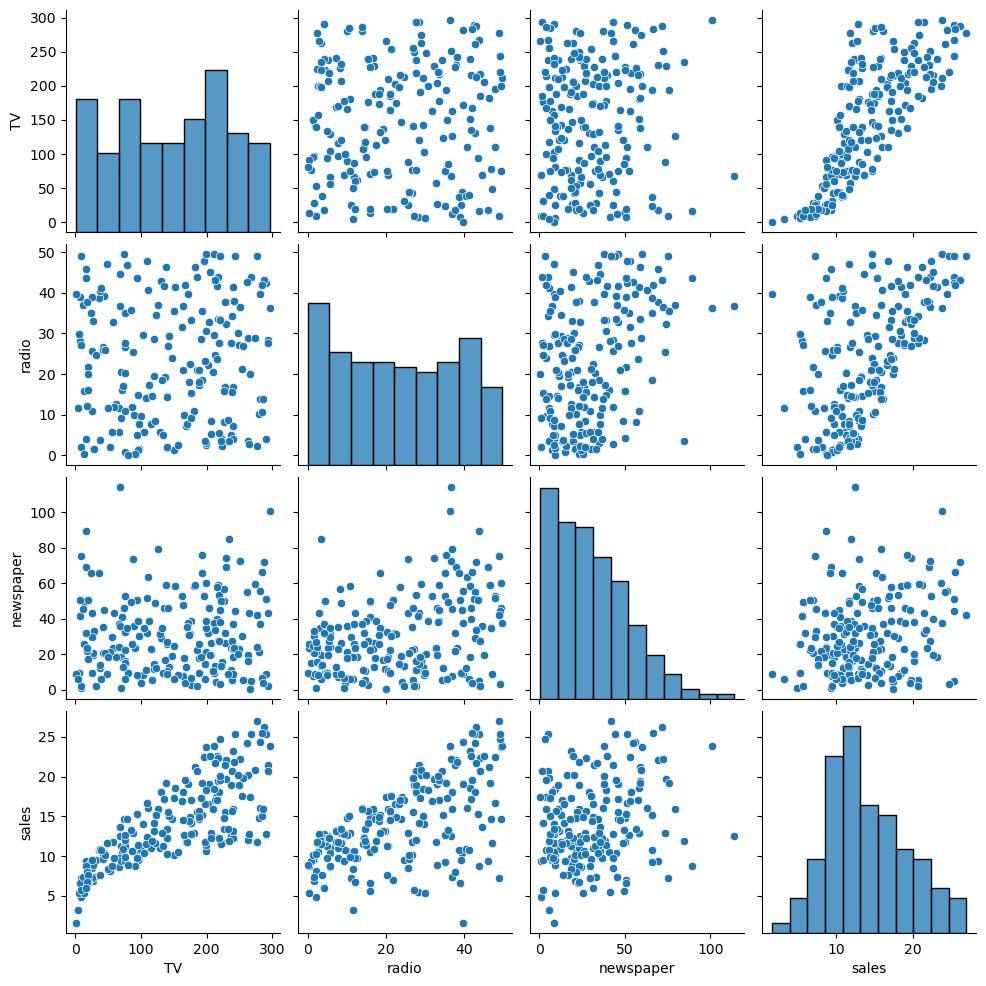

In [19]:
# Shortcut method to verify the first 2 assumptions
sns.pairplot(df)

### Train-Test-Split
- The machine learning model is trained on the training data and then asked to predict the output on the test data

In [22]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)
# X_train
# y_train
# y_test
# X_test

### Create Model/Estimator Instance
- In sklearn, an estimator is a python object that implements the fit(X, y) and predict(X) methods

In [50]:
from sklearn.linear_model import LinearRegression
lr_obj = LinearRegression()

### Train the Model


In [33]:
lr_obj.fit(X_train, y_train)

LinearRegression()

In [34]:
lr_obj.intercept_

3.0551216537620576

In [35]:
lr_obj.coef_

array([ 0.04597903,  0.18579595, -0.0030992 ])

### Evaluation of the Model
- Check the accuracy of our trained model by testing it on data that has never been used for training

In [37]:
y_pre = lr_obj.predict(X_test)
y_pre

array([12.47266269, 10.79713122, 17.11765267,  6.85073786,  9.77692921,
       11.72016397, 19.24446371, 10.46662309, 15.44509966, 16.13139908,
        9.78080142, 14.04705019, 16.53392308, 17.37352548,  8.84995583,
       23.11499   ,  8.19088085, 13.19373337,  9.84007626, 11.3593746 ,
       18.77622105, 12.03294526, 18.98214139, 20.44351881, 14.0199199 ,
       13.49422896, 12.15922044, 24.04539408,  9.17661604, 14.72829612,
       20.02443673,  9.83109916, 19.37855769, 21.19271869, 18.1905889 ,
       20.82406301,  6.60613385, 15.29816677, 20.363702  ,  6.15630662])

In [39]:
residuals_errors = y_test - y_pre
residuals

179    0.127337
166   -2.797131
187    0.182347
119   -0.250738
186    0.523071
134   -0.920164
142    0.855536
12    -1.266623
118    0.454900
178   -4.331399
138   -0.180801
43    -1.147050
194    0.766077
11     0.026475
44    -0.349956
101    0.685010
49     1.509119
4     -0.293733
149    0.259924
31     0.540625
188   -2.876221
116    0.167055
33    -1.582141
0      1.656481
181   -1.819920
161   -0.194229
2     -2.859220
183    2.154606
125    1.423384
81    -2.428296
176    0.175563
145    0.468901
124    0.321442
55     2.507281
153    0.809411
137   -0.024063
182    2.093866
156    0.001833
104    0.336298
106    1.043693
Name: sales, dtype: float64

### Model Metrics
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- R2 Score
- Adjusted R2 Score

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pre)
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
r2_score = r2_score (y_test, y_pre)
n = len(X_test)
m = 3
r2_adj = 1-((1-r2_score)*(n-1)/(n-m-1))
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2_score)
print("Adjusted R2 Score: ", r2_adj)

MAE:  1.0602981028984602
MSE:  2.153313413453085
RMSE:  1.4674172594913435
R2 Score:  0.9175053931302267
Adjusted R2 Score:  0.9106308425577456


### Homoscedasticity Verification

Text(0, 0.5, 'Residual Error')

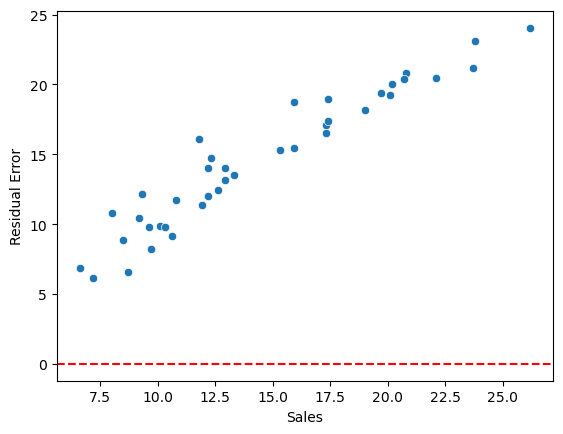

In [46]:
sns.scatterplot(x = y_test, y = y_pre)
plt.axhline(y = 0, color = 'r', ls = '--')
plt.xlabel('Sales')
plt.ylabel('Residual Error')

### Normality Verification Code

<Axes: xlabel='sales', ylabel='Count'>

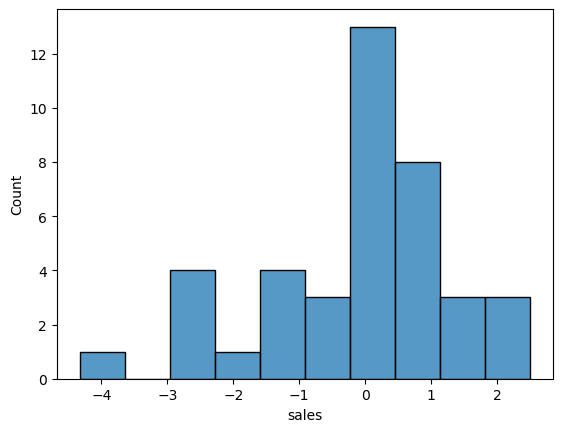

In [48]:
sns.histplot(data = residuals)